#import

In [ ]:
!unrar data.rar

In [27]:
import pandas as pd
import torch
import torch.utils.data as data
import torchvision
import torchvision.transforms as t
import torch.nn as nn
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import PIL as pil
import glob
from PIL import Image
from torchvision.datasets import DatasetFolder 

#landmarks

In [ ]:
landmarks = pd.read_json('/content/drive/MyDrive/Books Data/1/data/one.json')
print(landmarks)

In [96]:
#image_name = landmarks.iloc[:,0]
image_name = landmarks.values[2]
#print(image_name)

In [90]:
landmarks_arr = landmarks.iloc[:, 1:].values

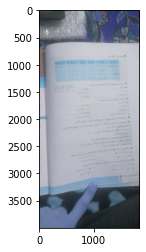

In [102]:
idx = torch.randint(0, image_name.__len__(), (1,)).item()

img = cv2.imread('/content/drive/MyDrive/Books Data/1/data/'+image_name[idx])
plt.imshow(img)
#plt.scatter(landmarks_arr[idx, 0::2], landmarks_arr[idx, 1::2], c='r', s=12)

#Custom Dataset

In [ ]:
# class LandmarkDetection(data.dataset):
#     def __init__(self):
#         pass
#     def __getitem__(self, idx):
#         pass
#     def __len__(self):
#         pass

In [105]:
 class LandmarkDetection(data.Dataset):
     def __init__(self, root, json_file,):
         pd.read_json(os.path.join(root, json_file))
         self.root = root
         self.transform = t.Compose([t.Grayscale(),
                                    t.Scale(512),
                                    #t.Resize((300, 300)),
                                    #t.RandomResizedCrop(200),
                                    t.ToTensor(),
                                    # t.Normalize((0.28), (0.48))
                                    ])
     def __getitem__(self, idx):
        image_name = self.lndm.iloc[idx, 0]
        img = pil.Image.open(os.path.join(self.root, image_name))
        img = self.transform(img)
        return img
     def __len__(self):
         return len(self.lndm)

In [ ]:
landmark = LandmarkDetection(root='/content/drive/MyDrive/Books Data/1/data', json_file='one.json')
#idx = torch.randint(0, landmark.__len__(), (1,)).item()
pil_conv = t.ToPILImage()
#img, x, y = landmark.__getitem__(idx)
t.functional.to_pil_image(img)

#******************

In [109]:
class ConvNet(nn.Module):
    def _init_(self):
        super(ConvNet, self)._init_()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x


model = ConvNet().to(device)

NameError: ignored

In [ ]:
riterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')